# Apple (AAPL) Quanitative Analysis

Apple is one of the largest competitve tech companies in the world, in this quanitative analysis, we will discuss its closing price throughout the history of the dataset that will be deployed and used for that purpose. The following Libraries will be utilized for the purpose of using quanitative methods to analyze Apple's stock price at closing and predicting in 2025 where there predicted closing price would be depending on historical gains and stock price. Furthermore, I will include statistical methods for this analysis.

Python Libraries:

- Matplotlib: Used for the purposes of plotting the graph for general data visualization
- Pandas: Used for data manipulation and analysis
- Fbprophet: Time-Series analysis for predicting and analyzing its future trends.

Excel Data Analysis:

- Exponential Smoothing: Smoothing out the graph for better visualization.
- Moving Average: Analyzing datapoints by creating a series of averages of different subsets of the data.

The dataset derived from Yahoo Finance and will use a 5 year hisotrical dataset.

# Deploying Libraries 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
import statsmodels.tsa.holtwinters as ets
%matplotlib inline

# Importing and Printing the Dataset

In [3]:
aapl = pd.read_csv('AAPL.csv')
aapl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-05,128.149994,128.449997,125.779999,125.800003,115.768646,49271400
1,2015-05-06,126.559998,126.750000,123.360001,125.010002,115.041649,72141000
2,2015-05-07,124.769997,126.080002,124.019997,125.260002,115.753204,43940900
3,2015-05-08,126.680000,127.620003,126.110001,127.620003,117.934090,55550400
4,2015-05-11,127.389999,127.559998,125.629997,126.320000,116.732750,42035800
...,...,...,...,...,...,...,...
1254,2020-04-28,285.079987,285.829987,278.200012,278.579987,278.579987,28001200
1255,2020-04-29,284.730011,289.670013,283.890015,287.730011,287.730011,34320200
1256,2020-04-30,289.959991,294.529999,288.350006,293.799988,293.799988,45766000
1257,2020-05-01,286.250000,299.000000,285.850006,289.070007,289.070007,60154200


# General Historical Data Visualization

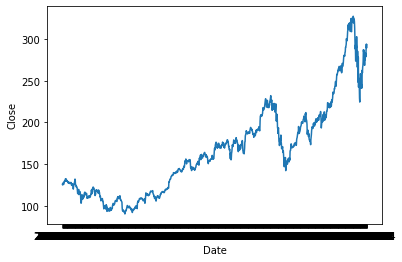

In [10]:
plt.plot(aapl.Date,aapl.Close)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

Based on the above graph, we can see the actual Apple's stock graph. 

# Predicting Apple's (AAPL) Future Closing Price  

In [11]:
a = fbprophet.Prophet()

In [12]:
df = aapl
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-05,128.149994,128.449997,125.779999,125.800003,115.768646,49271400
1,2015-05-06,126.559998,126.750000,123.360001,125.010002,115.041649,72141000
2,2015-05-07,124.769997,126.080002,124.019997,125.260002,115.753204,43940900
3,2015-05-08,126.680000,127.620003,126.110001,127.620003,117.934090,55550400
4,2015-05-11,127.389999,127.559998,125.629997,126.320000,116.732750,42035800
...,...,...,...,...,...,...,...
1254,2020-04-28,285.079987,285.829987,278.200012,278.579987,278.579987,28001200
1255,2020-04-29,284.730011,289.670013,283.890015,287.730011,287.730011,34320200
1256,2020-04-30,289.959991,294.529999,288.350006,293.799988,293.799988,45766000
1257,2020-05-01,286.250000,299.000000,285.850006,289.070007,289.070007,60154200


In [15]:
df[['ds','y']]=df[['Date','Close']]
df=df[['ds','y']]
df

,ds,y
0,2015-05-05,125.800003
1,2015-05-06,125.010002
2,2015-05-07,125.260002
3,2015-05-08,127.620003
4,2015-05-11,126.320000
...,...,...
1254,2020-04-28,278.579987
1255,2020-04-29,287.730011
1256,2020-04-30,293.799988
1257,2020-05-01,289.070007


In [16]:
a.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = a.make_future_dataframe(periods=1825)
future.tail()

,ds
3079,2025-04-29
3080,2025-04-30
3081,2025-05-01
3082,2025-05-02
3083,2025-05-03


Below Illistrates the Dataset prediction in 5 years as well as its trend.

In [29]:
future=a.predict(future)
future.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3079,2025-04-29,838.172196,50.885847,1676.262248,51.324619,1677.144434,-0.229516,-0.229516,-0.229516,2.057700,2.057700,2.057700,-2.287217,-2.287217,-2.287217,0.0,0.0,0.0,837.942680
3080,2025-04-30,838.468416,45.620764,1679.069942,50.560669,1678.330555,-0.143843,-0.143843,-0.143843,2.233967,2.233967,2.233967,-2.377811,-2.377811,-2.377811,0.0,0.0,0.0,838.324573
3081,2025-05-01,838.764636,54.217586,1673.533577,49.758203,1679.508144,-0.319347,-0.319347,-0.319347,2.146803,2.146803,2.146803,-2.466150,-2.466150,-2.466150,0.0,0.0,0.0,838.445289
3082,2025-05-02,839.060856,45.432874,1672.440179,48.979734,1680.318833,-0.685865,-0.685865,-0.685865,1.865981,1.865981,1.865981,-2.551846,-2.551846,-2.551846,0.0,0.0,0.0,838.374992
3083,2025-05-03,839.357076,38.708364,1675.469649,48.545132,1681.129522,-7.632704,-7.632704,-7.632704,-4.997954,-4.997954,-4.997954,-2.634751,-2.634751,-2.634751,0.0,0.0,0.0,831.724372


# Prediction of the Dataset

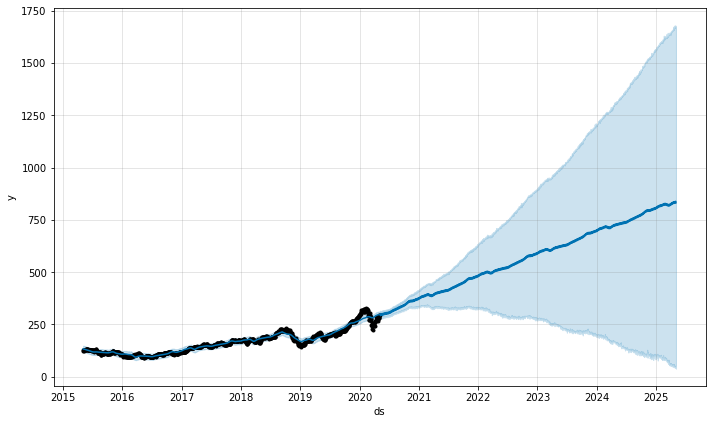

In [31]:
a.plot(future);

Based on the given prediction of the dataset, apple looks to be an exceptional profitable company. We can see that the trend line keeps going in an upward trend. According to the given prediction data, in 5 years, apple is looking at a predicted market value at or between $838.00-$839.00/share. This prediction is really astounding given that apple has been successful for decades for their products, such as iPad, iPhone, .etc. When Apple products are released and enter the market, their revenue would spike because alot of people watch the product announcements, demo the new products, and so on. By 2025 as the prediction is shown, apple looks to be a high revenue profiting company. Apple remains to this day a leading company in the technology industry for investors who enjoy flooding capital into Apple, since thay have equity in the stock exchange. 

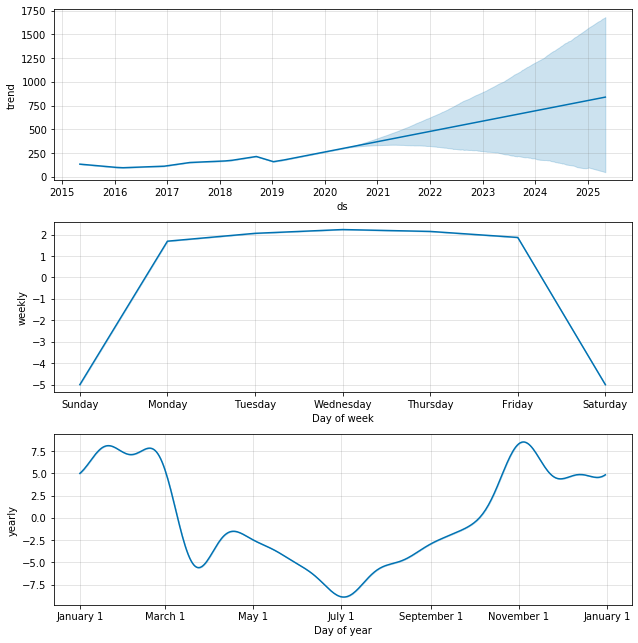

In [33]:
a.plot_components(future);

Above, I will be discussing the seasonality's based on trend, weekly, and yearly.

- Trend: Based on its trend, we can say Apple is looking at a market value that is so high as mentioned above when the prediction output was discussed. 
- Weekly: We can say that weekly has its gain beginning Monday thru Friday at around 1-2% gain in market capital gain. These gains are promising, however they are a prediction so we cannot say for certian they will happen, but based on feeding a 5 year dataset, we can say thats a possibility senario given that economic conditions for investors are operating in a smooth manner.

- Yearly: Based on the yearly, the gains would reach its peak at about 7.5%, this yearly gain is given because of the predicted stock closing price prediction. Investing in apple is great in the long-term because investors can benefit from a dividend yeild percentage of 1.07%. Apple is one of the tech companies to pay out dividends to its investors who supported the comapany. So, we can say in 5 years apple would be an revenue hungry company.                                                                 

# Exponential Smoothing

Furthermore, this analysis will go into statistical analysis. This analysis will go through Exponential Smoothing. Exponential Smoothing is a statistical method aimed at smoothing out the weighted moving average. That is because it will better visualize the graph for investors to make reasonable investment in the NASDAQ/NYSE exchange. Exponential Smoothing is also a time-series analysis, similar to Fbprophet, however, this method would be analyzed on the statistical side. 

# 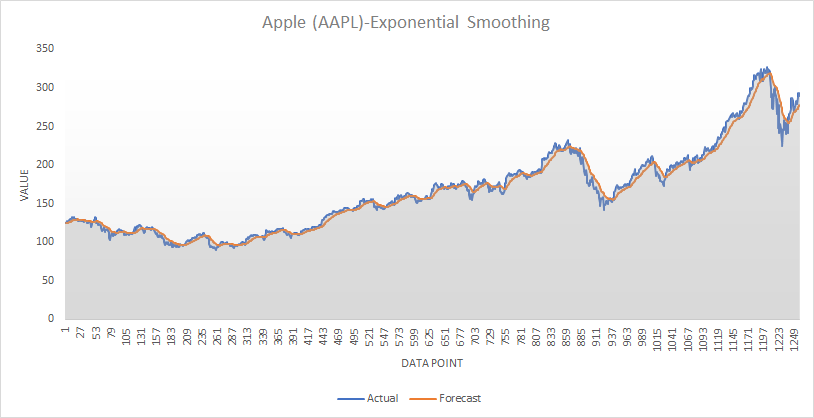

Above, you can see we have a smooth out graph of the dataset. This graph was produced with Excel's Data Analysis tool that allows to smooth out the graph to give a better visualization of the actual data as well as its forecased trend. First, before producing this data, I added a damping factor of 0.9. Now, damping factor is a way of saying to smooth out the graph of the data, to make it smooth to aviod overlapping of the data. This graph is the Exponential smoothing of the predicted closing for Apple (AAPL).  

# Moving Average

Moving average is considered a simple technical analysis tool, much like exponential smoothing, it smooths out the datapoints by producing a constantly updated average price. This tool is aimed to help investors get vital data that determines what is the average stock price in any given time. It can be 10 days, 20 minutes, or weeks. 

# 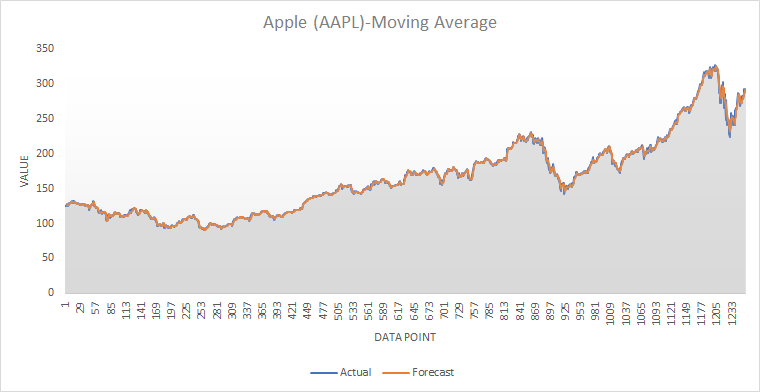

Above, we can see that the moving average, similar to Exponential Smoothing, the data is smoothed out, this gives a better visualization of the data and it gives investors a better outlook about the average market value price. According to the Moving Average analysis, the average value is between $125.00-$292.00. This is good, but in data analysis and visualization, I see the market going to spike in 5 years once we reach 2025. 

# Conclusion

In summary, at the end of the day, Apple is still one of the most competitor in the technology industry. The Fbprophet has shown a prediction in 5 years, apple would gain a market value between $838.00-$839.00/share. This prediction is sure going to give investors in hopes that dividend yeild could be high. Apple is great in marketing strategy as well as knowing how to appeal their products to the general public. When the statistical analysis was performed, we can see that Exponential Smoothing and Moving Average shows a promise in average market value and smoothing out the data to help investors and financial analysts figure out where the market would trend in days, weeks, months, or years. Overall, this analysis of Apple would surely be the one to watch to see what the financial impact would play out in 2025, but that is too soon to tell. The predictions are promising, but we will have to wait until 2025 based on its economic conditions. 